In [ ]:
#Perform Principal component analysis and perform clustering using first
#3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain
#optimum number of clusters and check whether we have obtained same number of clusters with the original data
#(class column we have ignored at the begining who shows it has 3 clusters)df

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# Assuming 'df' is your DataFrame with the data (excluding the 'class' column)
# For demonstration purposes, I'm using a synthetic dataset
df = pd.read_csv('/content/wine.csv')

In [ ]:
# Step 1: Perform Principal Component Analysis (PCA)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df)

In [ ]:
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

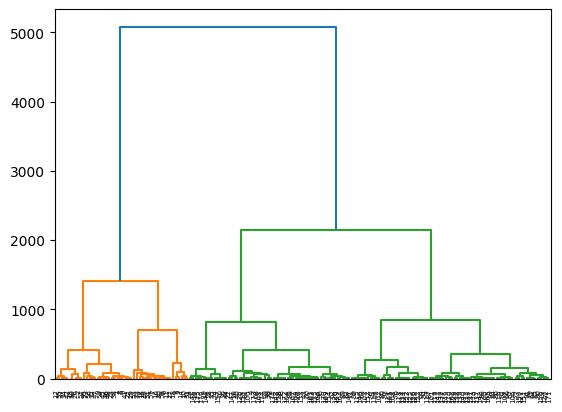

In [ ]:
# Step 2: Perform hierarchical clustering
linked = linkage(pc_df, method='ward', metric='euclidean')
dendrogram_plot = dendrogram(linked)

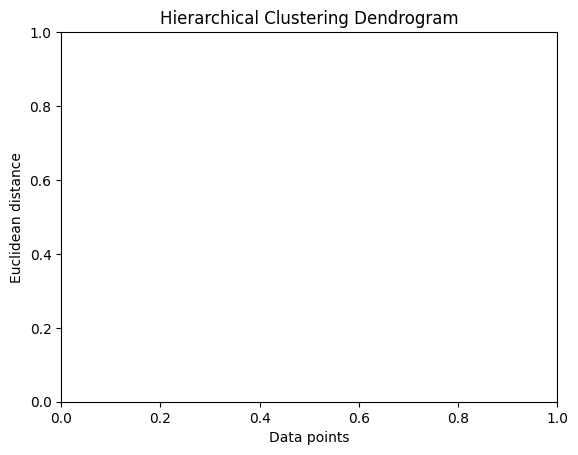

In [ ]:
# Display the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
# Step 3: Perform k-means clustering and determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pc_df)
    inertia.append(kmeans.inertia_)

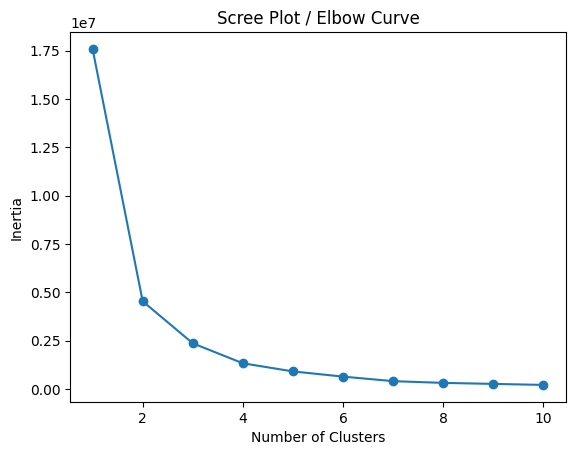

In [ ]:
# Plot the scree plot or elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Scree Plot / Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Step 4: Based on the elbow curve, choose the optimal number of clusters
# In this example, let's say the optimal number is 3 (you should visually inspect the plot)
optimal_clusters = 3

In [ ]:
# Step 5: Perform k-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans_optimal.fit_predict(pc_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Assuming 'Type' is the class column
class_column = 'Type'

In [ ]:
# Assuming df is your DataFrame
X = df.drop(columns=[class_column, 'Cluster'])  # Drop the class column and any other irrelevant columns
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print the confusion matrix or any other metric to compare the results
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(original_clusters, df['Cluster'])
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  0  0  0]
 [ 0 46 13  0]
 [50  1 20  0]
 [19  0 29  0]]
